## Programming 2.1
### PCA Coding (25 points)

**Task Description:**
- You are asked to project data in the iris dataset into smaller subspaces, using PCA. It should be implemented from scratch in Python. Only numpy is allowed for calculation (Dataset loading and figure plotting are free to use other packages).

**Datasets:**
- `iris`- is exactly the one you have played with in SVM programming homework.

### Load Data and Notebook Setup

In [1]:
import pandas as pd
import numpy as np

iris_dataset = pd.read_excel('Classification iris.xlsx')

class_names = iris_dataset['class'].unique().tolist()
X = iris_dataset.to_numpy()[:, 1:5]
y = iris_dataset.to_numpy()[:, -1]

### (1) Split Train & Test Set
- as was done for SVM hw1

In [2]:
X_train, y_train = [], []
X_test, y_test = [], []
instance_ids_train, instance_ids_test = [], []

for i, name in enumerate(class_names):
    mask = (y == name)
    n_train = int(0.7 * mask.sum())
    
    X_train.append(X[mask][:n_train])
    y_train.append(y[mask][:n_train])

    X_test.append(X[mask][n_train:])
    y_test.append(y[mask][n_train:])

    instance_ids_train.extend((np.where(mask)[0][:n_train] + 1).tolist())
    instance_ids_test.extend((np.where(mask)[0][n_train:] + 1).tolist())

X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

print(f"""
Q2.1.1 Split training set and test set:
Training set: {instance_ids_train}

Test set: {instance_ids_test}
""".strip())

Q2.1.1 Split training set and test set:
Training set: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]

Test set: [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


In [3]:
np.cov(X_train.astype(float), rowvar=False)

array([[ 0.71702381, -0.05049908,  1.31572802,  0.50727564],
       [-0.05049908,  0.20918864, -0.38658516, -0.1430641 ],
       [ 1.31572802, -0.38658516,  3.22977473,  1.30017308],
       [ 0.50727564, -0.1430641 ,  1.30017308,  0.56328205]])

### (2) SVD Decompostion

In [4]:
# Mean vector
mean_vector = np.mean(X_train, axis=0)

# Covariance matrix
covariance_matrix = np.cov(X_train.astype(float), rowvar=False)

# SVD
U, S, Vt = np.linalg.svd(covariance_matrix)

# Eigenvalues are the squares of the singular values
eigenvalues = S**2 / (X_train.shape[0] - 1)
eigenvectors = U

print(f"""
Q2.1.2 SVD decomposition:
Mean vector: 
{mean_vector}\n
Covariance matrix: 
{covariance_matrix}\n
Eigenvalues (vector):
{eigenvalues}\n
Eigenvectors (matrix): 
{eigenvectors}
""".strip())


Q2.1.2 SVD decomposition:
Mean vector: 
[5.890476190476192 3.0580952380952393 3.805714285714287 1.1866666666666663]

Covariance matrix: 
[[ 0.71702381 -0.05049908  1.31572802  0.50727564]
 [-0.05049908  0.20918864 -0.38658516 -0.1430641 ]
 [ 1.31572802 -0.38658516  3.22977473  1.30017308]
 [ 0.50727564 -0.1430641   1.30017308  0.56328205]]

Eigenvalues (vector):
[1.82016200e-01 7.02850673e-04 5.99722340e-05 3.50944028e-06]

Eigenvectors (matrix): 
[[-0.3612084  -0.67668874  0.5437191   0.34057361]
 [ 0.09667266 -0.71059308 -0.61616041 -0.32566581]
 [-0.86000139  0.16246182 -0.06924822 -0.47875719]
 [-0.34724702  0.10371103 -0.56561522  0.74077186]]


### (3) Project onto 1-Dim subspace and reconstruct

In [5]:
# First principal component
first_principal_component = U[:, 0]

# Projection Matrix for 1-D projection
projection_1d_matrix = first_principal_component.reshape(-1, 1)

# Project train and test sets onto the 1D subspace using the projection matrix
X_train_mapped_1d = X_train.dot(projection_1d_matrix)
X_test_mapped_1d = X_test.dot(projection_1d_matrix)

# Reconstructed data
X_train_reconstructed_1d = X_train_mapped_1d.dot(projection_1d_matrix.T)
X_test_reconstructed_1d = X_test_mapped_1d.dot(projection_1d_matrix.T)

# Variance of the mapped data
variance_train_1d = np.var(X_train_mapped_1d)
variance_test_1d = np.var(X_test_mapped_1d)

# Reconstruction loss
reconstruction_loss_train_1d = np.mean(np.square(X_train - X_train_reconstructed_1d))
reconstruction_loss_test_1d = np.mean(np.square(X_test - X_test_reconstructed_1d))

print(f"""
Q2.1.3 Project onto 1-dimensional subspace and reconstruct:
Projection Matrix W: 
{projection_1d_matrix}\n

shape of X_train_mapped: {X_train_mapped_1d.shape}, shape of X_train_reconstructed: {X_train_reconstructed_1d.shape}
variance_train: {variance_train_1d}
reconstruction_loss_train: {reconstruction_loss_train_1d}\n

shape of X_test_mapped: {X_test_mapped_1d.shape}, shape of X_test_reconstructed: {X_test_reconstructed_1d.shape}
variance_test: {variance_test_1d}
reconstruction_loss_test: {reconstruction_loss_test_1d}\n
""".strip())


Q2.1.3 Project onto 1-dimensional subspace and reconstruct:
Projection Matrix W: 
[[-0.3612084 ]
 [ 0.09667266]
 [-0.86000139]
 [-0.34724702]]


shape of X_train_mapped: (105, 1), shape of X_train_reconstructed: (105, 4)
variance_train: 4.309389319247093
reconstruction_loss_train: 7.467121187662156


shape of X_test_mapped: (45, 1), shape of X_test_reconstructed: (45, 4)
variance_test: 3.907084095695329
reconstruction_loss_test: 7.179119300649846


### (4) Project onto 2-Dim subspace and reconstruct

In [6]:
# First two principal components
U_2 = U[:, :2]  # Select the first two principal components

# Projection Matrix for 2-D projection
projection_2d_matrix = U_2

# Project train and test sets onto the 2D subspace using the projection matrix
X_train_mapped_2d = X_train.dot(U_2)
X_test_mapped_2d = X_test.dot(U_2)

# Reconstructed data
X_train_reconstructed_2d = X_train_mapped_2d.dot(U_2.T)
X_test_reconstructed_2d = X_test_mapped_2d.dot(U_2.T)

# Variance of the mapped data
variance_train_2d = np.var(X_train_mapped_2d, axis=0).sum()  # Sum of variances for both components
variance_test_2d = np.var(X_test_mapped_2d, axis=0).sum()    # Sum of variances for both components

# Reconstruction loss
reconstruction_loss_train_2d = np.mean(np.square(X_train - X_train_reconstructed_2d))
reconstruction_loss_test_2d = np.mean(np.square(X_test - X_test_reconstructed_2d))

print(f"""
Q2.1.4 Project onto 2-dimensional subspace and reconstruct:
Projection Matrix W: 
{projection_2d_matrix}\n

shape of X_train_mapped: {X_train_mapped_2d.shape}, shape of X_train_reconstructed: {X_train_reconstructed_2d.shape}
variance_train: {variance_train_2d}
reconstruction_loss_train: {reconstruction_loss_train_2d}\n

shape of X_test_mapped: {X_test_mapped_2d.shape}, shape of X_test_reconstructed: {X_test_reconstructed_2d.shape}
variance_test: {variance_test_2d}
reconstruction_loss_test: {reconstruction_loss_test_2d}\n
""".strip())


Q2.1.4 Project onto 2-dimensional subspace and reconstruct:
Projection Matrix W: 
[[-0.3612084  -0.67668874]
 [ 0.09667266 -0.71059308]
 [-0.86000139  0.16246182]
 [-0.34724702  0.10371103]]


shape of X_train_mapped: (105, 2), shape of X_train_reconstructed: (105, 4)
variance_train: 4.5771780164238836
reconstruction_loss_train: 0.06223372714672654


shape of X_test_mapped: (45, 2), shape of X_test_reconstructed: (45, 4)
variance_test: 4.078378031615013
reconstruction_loss_test: 0.05266219588944268


### (5) Project onto 3-Dim subspace and reconstruct

In [7]:
# First three principal components
U_3 = U[:, :3]  # Select the first three principal components

# Projection Matrix for 3-D projection
projection_3d_matrix = U_3

# Project train and test sets onto the 3D subspace using the projection matrix
X_train_mapped_3d = X_train.dot(U_3)
X_test_mapped_3d = X_test.dot(U_3)

# Reconstructed data
X_train_reconstructed_3d = X_train_mapped_3d.dot(U_3.T)
X_test_reconstructed_3d = X_test_mapped_3d.dot(U_3.T)

# Variance of the mapped data
variance_train_3d = np.var(X_train_mapped_3d, axis=0).sum()  # Sum of variances for all three components
variance_test_3d = np.var(X_test_mapped_3d, axis=0).sum()    # Sum of variances for all three components

# Reconstruction loss
reconstruction_loss_train_3d = np.mean(np.square(X_train - X_train_reconstructed_3d))
reconstruction_loss_test_3d = np.mean(np.square(X_test - X_test_reconstructed_3d))

print(f"""
Q2.1.5 Project onto 3-dimensional subspace and reconstruct:
Projection Matrix W: 
{projection_3d_matrix}\n

shape of X_train_mapped: {X_train_mapped_3d.shape}, shape of X_train_reconstructed: {X_train_reconstructed_3d.shape}
variance_train: {variance_train_3d}
reconstruction_loss_train: {reconstruction_loss_train_3d}\n

shape of X_test_mapped: {X_test_mapped_3d.shape}, shape of X_test_reconstructed: {X_test_reconstructed_3d.shape}
variance_test: {variance_test_3d}
reconstruction_loss_test: {reconstruction_loss_test_3d}\n
""".strip())


Q2.1.5 Project onto 3-dimensional subspace and reconstruct:
Projection Matrix W: 
[[-0.3612084  -0.67668874  0.5437191 ]
 [ 0.09667266 -0.71059308 -0.61616041]
 [-0.86000139  0.16246182 -0.06924822]
 [-0.34724702  0.10371103 -0.56561522]]


shape of X_train_mapped: (105, 3), shape of X_train_reconstructed: (105, 4)
variance_train: 4.655401260550288
reconstruction_loss_train: 0.005861609796743569


shape of X_test_mapped: (45, 3), shape of X_test_reconstructed: (45, 4)
variance_test: 4.154147325738942
reconstruction_loss_test: 0.011970068782518507


### (6) Plotting

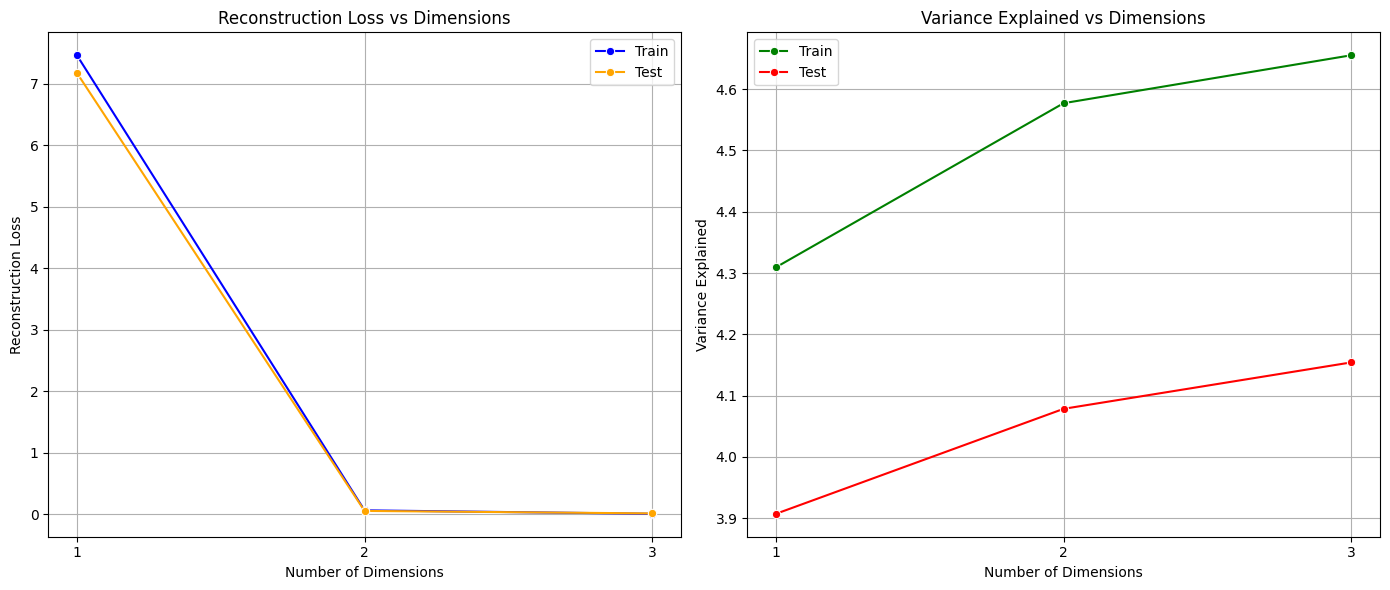

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dimensions = [1, 2, 3]
reconstruction_loss_train = [reconstruction_loss_train_1d, reconstruction_loss_train_2d, reconstruction_loss_train_3d]
reconstruction_loss_test = [reconstruction_loss_test_1d, reconstruction_loss_test_2d, reconstruction_loss_test_3d]
variance_train = [variance_train_1d, variance_train_2d, variance_train_3d]
variance_test = [variance_test_1d, variance_test_2d, variance_test_3d]

# Prepare data for plotting
data_loss = {
    'Dimensions': dimensions,
    'Reconstruction Loss - Train': reconstruction_loss_train,
    'Reconstruction Loss - Test': reconstruction_loss_test
}

data_variance = {
    'Dimensions': dimensions,
    'Variance - Train': variance_train,
    'Variance - Test': variance_test
}

# Plotting Reconstruction Loss
plt.figure(figsize=(14, 6))

# Subplot for Reconstruction Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=data_loss, x='Dimensions', y='Reconstruction Loss - Train', marker='o', label='Train', color='blue')
sns.lineplot(data=data_loss, x='Dimensions', y='Reconstruction Loss - Test', marker='o', label='Test', color='orange')
plt.title('Reconstruction Loss vs Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Reconstruction Loss')
plt.xticks(dimensions)
plt.grid()

# Subplot for Variance
plt.subplot(1, 2, 2)
sns.lineplot(data=data_variance, x='Dimensions', y='Variance - Train', marker='o', label='Train', color='green')
sns.lineplot(data=data_variance, x='Dimensions', y='Variance - Test', marker='o', label='Test', color='red')
plt.title('Variance Explained vs Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Variance Explained')
plt.xticks(dimensions)
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()



Q2.1.6 Plotting: 
Dimension - Variance:



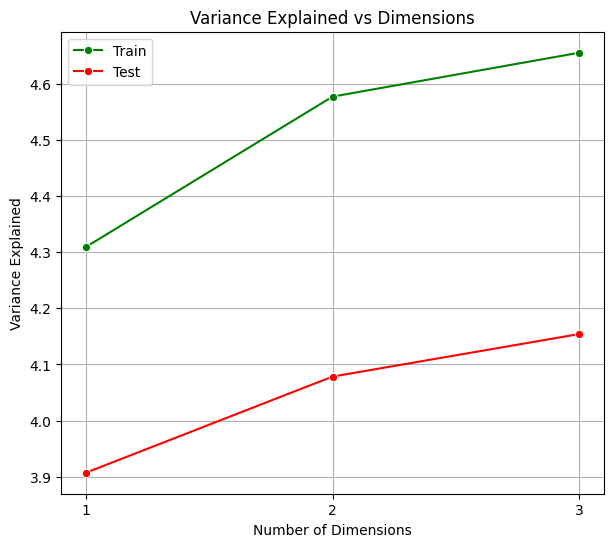

 
1. Train Variance:
    - The variance of the data increases as the number of dimensions increases.
    - The variance of the data is highest when 3 dimensions are considered.
    - The variance of the data is lowest when only the 1st dimension is considered.
    Overall, the train variance shows a positive (almost linear) relationship with the number of dimensions.

2. Test Variance:
    - The variance of the data increases as the number of dimensions increases.
    - The variance of the data is highest when 3 dimensions are considered.
    - The variance of the data is lowest when only the 1st dimension is considered.
    Overall, the test variance shows a positive (almost linear) relationship with the number of dimensions.
      
3. Train vs Test Variance:
    - Comparing both train and test variance, the test variance is slightly lower than the train variance.


Dimension - Reconstruction Loss:



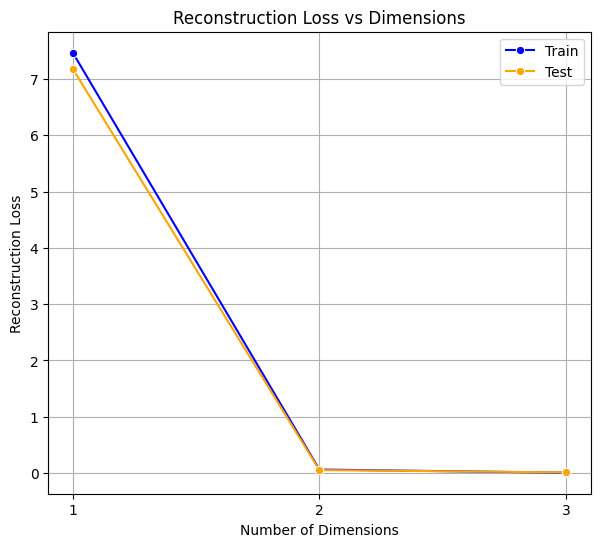

 
1. Train Reconstruction Loss:
    - The reconstruction loss of the data decreases as the number of dimensions increases.
    - The reconstruction loss of the data is lowest when 3 dimensions are considered.
    - The reconstruction loss of the data is highest when only the 1st dimension is considered.
    - The drop in reconstruction loss from the 1st to 2nd dimension is very significant.
    Overall, the train reconstruction loss shows a negative relationship with the number of dimensions.
      
2. Test Reconstruction Loss:
    - The reconstruction loss of the data decreases as the number of dimensions increases.
    - The reconstruction loss of the data is lowest when 3 dimensions are considered.
    - The reconstruction loss of the data is highest when only the 1st dimension is considered.
    - The drop in reconstruction loss from the 1st to 2nd dimension is very significant.
    Overall, the test reconstruction loss shows a negative relationship with the number of dimensions.
 

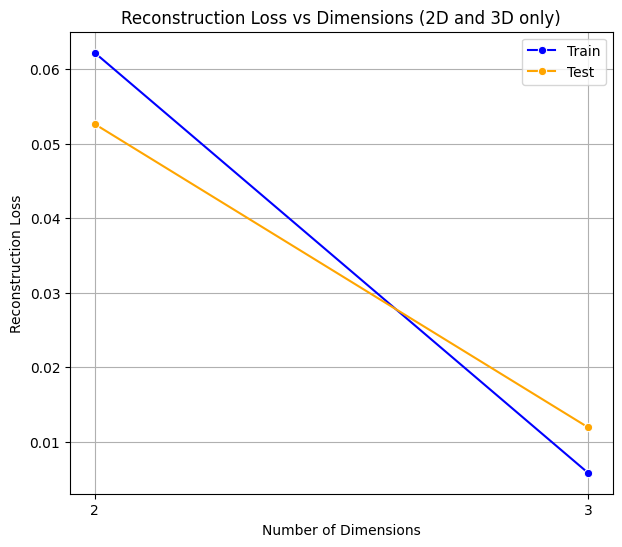

 
Taking a closer look at the reconstruction loss for 2D and 3D:
2D:
    - The train reconstruction loss is higher than the test reconstruction loss.

3D:
    - The train reconstruction loss is lower than the test reconstruction loss.



In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dimensions = [1, 2, 3]

variance_train = [variance_train_1d, variance_train_2d, variance_train_3d]
variance_test = [variance_test_1d, variance_test_2d, variance_test_3d]

# Plot dimension - variance
data_variance = {
    'Dimensions': dimensions,
    'Variance - Train': variance_train,
    'Variance - Test': variance_test
}

# Plotting Variance
plt.figure(figsize=(7, 6))
sns.lineplot(data=data_variance, x='Dimensions', y='Variance - Train', marker='o', label='Train', color='green')
sns.lineplot(data=data_variance, x='Dimensions', y='Variance - Test', marker='o', label='Test', color='red')
plt.title('Variance Explained vs Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Variance Explained')
plt.xticks(dimensions)
plt.grid()

# Show the plot
print(f"""
Q2.1.6 Plotting: 
Dimension - Variance:
""")
plt.show()
# Description of relation between dimension and reconstruction loss
print(f""" 
1. Train Variance:
    - The variance of the data increases as the number of dimensions increases.
    - The variance of the data is highest when 3 dimensions are considered.
    - The variance of the data is lowest when only the 1st dimension is considered.
    Overall, the train variance shows a positive (almost linear) relationship with the number of dimensions.

2. Test Variance:
    - The variance of the data increases as the number of dimensions increases.
    - The variance of the data is highest when 3 dimensions are considered.
    - The variance of the data is lowest when only the 1st dimension is considered.
    Overall, the test variance shows a positive (almost linear) relationship with the number of dimensions.
      
3. Train vs Test Variance:
    - Comparing both train and test variance, the test variance is slightly lower than the train variance.
""")



reconstruction_loss_train = [reconstruction_loss_train_1d, reconstruction_loss_train_2d, reconstruction_loss_train_3d]
reconstruction_loss_test = [reconstruction_loss_test_1d, reconstruction_loss_test_2d, reconstruction_loss_test_3d]

# Plot for Dimension - Reconstruction Loss
data_loss = {
    'Dimensions': dimensions,
    'Reconstruction Loss - Train': reconstruction_loss_train,
    'Reconstruction Loss - Test': reconstruction_loss_test
}

# Plotting Reconstruction Loss
plt.figure(figsize=(7, 6))
sns.lineplot(data=data_loss, x='Dimensions', y='Reconstruction Loss - Train', marker='o', label='Train', color='blue')
sns.lineplot(data=data_loss, x='Dimensions', y='Reconstruction Loss - Test', marker='o', label='Test', color='orange')
plt.title('Reconstruction Loss vs Dimensions')
plt.xlabel('Number of Dimensions')
plt.ylabel('Reconstruction Loss')
plt.xticks(dimensions)
plt.grid()

# Show the plot
print(f"""
Dimension - Reconstruction Loss:
""")
plt.show()
# Description of relation between dimension and reconstruction loss
print(f""" 
1. Train Reconstruction Loss:
    - The reconstruction loss of the data decreases as the number of dimensions increases.
    - The reconstruction loss of the data is lowest when 3 dimensions are considered.
    - The reconstruction loss of the data is highest when only the 1st dimension is considered.
    - The drop in reconstruction loss from the 1st to 2nd dimension is very significant.
    Overall, the train reconstruction loss shows a negative relationship with the number of dimensions.
      
2. Test Reconstruction Loss:
    - The reconstruction loss of the data decreases as the number of dimensions increases.
    - The reconstruction loss of the data is lowest when 3 dimensions are considered.
    - The reconstruction loss of the data is highest when only the 1st dimension is considered.
    - The drop in reconstruction loss from the 1st to 2nd dimension is very significant.
    Overall, the test reconstruction loss shows a negative relationship with the number of dimensions.
      
3. Train vs Test Reconstruction Loss:
    - Both train and test reconstruction loss show similar trends with respect to the number of dimensions.
    - However, due to the skewed horizontal axis, the difference in reconstruction loss from the 2nd to 3rd dimension is not clearly visible.
""")


# Plot second graph for dimension vs reconstruction loss but for 2D and 3D only for better visualization
new_dimensions = [2, 3]
new_reconstruction_loss_train = [reconstruction_loss_train_2d, reconstruction_loss_train_3d]
new_reconstruction_loss_test = [reconstruction_loss_test_2d, reconstruction_loss_test_3d]

# Plot for Dimension - Reconstruction Loss
new_data_loss = {
    'Dimensions': new_dimensions,
    'Reconstruction Loss - Train': new_reconstruction_loss_train,
    'Reconstruction Loss - Test': new_reconstruction_loss_test
}

# Plotting Reconstruction Loss
plt.figure(figsize=(7, 6))
sns.lineplot(data=new_data_loss, x='Dimensions', y='Reconstruction Loss - Train', marker='o', label='Train', color='blue')
sns.lineplot(data=new_data_loss, x='Dimensions', y='Reconstruction Loss - Test', marker='o', label='Test', color='orange')
plt.title('Reconstruction Loss vs Dimensions (2D and 3D only)')
plt.xlabel('Number of Dimensions')
plt.ylabel('Reconstruction Loss')
plt.xticks(new_dimensions)
plt.grid()

# Show the plot
print(f"""
Dimension - Reconstruction Loss:
""")
plt.show()
# Description of relation between dimension and reconstruction loss
print(f""" 
Taking a closer look at the reconstruction loss for 2D and 3D:
2D:
    - The train reconstruction loss is higher than the test reconstruction loss.

3D:
    - The train reconstruction loss is lower than the test reconstruction loss.
""")